# Kaggle challenge link
https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import HTML, display
from tabulate import tabulate

from zipfile import ZipFile

In [2]:
#unzipping file
with ZipFile('train.csv.zip', 'r') as f:
    f.extractall()

# Setup + Cleaning

In [32]:
#making train and test sets from the csv file
train = pd.read_csv("train.csv", nrows = 500_000)
test  = pd.read_csv("test.csv")

In [33]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [34]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,500000.000000
mean,11.358361,-72.519958,39.920276,-72.522435,39.916526,1.683428
std,9.916617,11.856831,8.073475,11.797362,7.391002,1.307395
min,-44.900000,-2986.242495,-3116.285383,-3383.296608,-2559.748913,0.000000
25%,6.000000,-73.992047,40.734917,-73.991382,40.734057,1.000000
50%,8.500000,-73.981785,40.752670,-73.980126,40.753152,1.000000
75%,12.500000,-73.967117,40.767076,-73.963572,40.768135,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


In [ ]:
test.head()

In [35]:
#making prediction set
train_Y = np.array(train['fare_amount'])
key = test['key']

#dropping these in order to pull out the pickup/dropoff columns and place
# in a new dataframe called df_1
train = train.drop(['key','pickup_datetime','fare_amount'],axis = 1)
test = test.drop(['key'],axis = 1)

df_1 = pd.concat([train,test])
df_1.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime
0,-73.844311,40.721319,-73.841610,40.712278,1,NaN
1,-74.016048,40.711303,-73.979268,40.782004,1,NaN
2,-73.982738,40.761270,-73.991242,40.750562,2,NaN
3,-73.987130,40.733143,-73.991567,40.758092,1,NaN
4,-73.968095,40.768008,-73.956655,40.783762,1,NaN


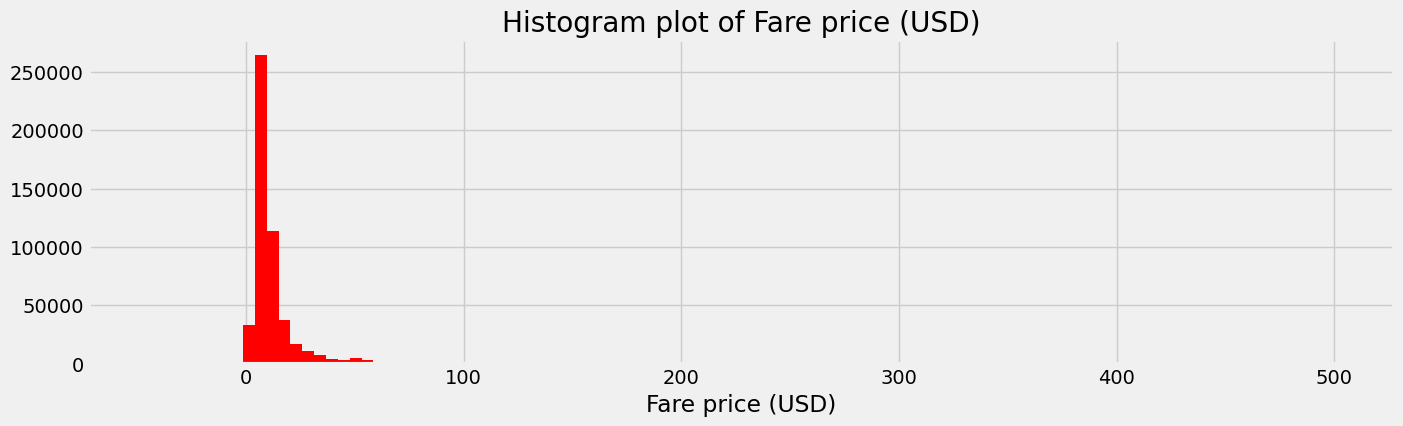

In [36]:
#histogram of fare price for each trip in the dataset
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 4))

plt.hist(train_Y, bins=100, color='red')
plt.xlabel("Fare price (USD)")
plt.title("Histogram plot of Fare price (USD)")
plt.show()

In [37]:
#finding difference of long/lat's in order to observe passenger movement
train['d_latitude'] = (train['dropoff_latitude'] -
                       train['pickup_latitude']).abs()
train['d_longitude'] = (train['dropoff_latitude'] -
                       train['pickup_latitude']).abs()

test['d_latitude'] = (test['dropoff_latitude'] -
                       test['pickup_latitude']).abs()
test['d_longitude'] = (test['dropoff_latitude'] -
                       test['pickup_latitude']).abs()

train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,d_latitude,d_longitude
0,-73.844311,40.721319,-73.841610,40.712278,1,0.009041,0.009041
1,-74.016048,40.711303,-73.979268,40.782004,1,0.070701,0.070701
2,-73.982738,40.761270,-73.991242,40.750562,2,0.010708,0.010708
3,-73.987130,40.733143,-73.991567,40.758092,1,0.024949,0.024949
4,-73.968095,40.768008,-73.956655,40.783762,1,0.015754,0.015754


# Prediction Model

# Prediction CSV